In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [3]:
# Load Dataset
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Select features: Annual Income & Spending Score
x = df.iloc[:, [3, 4]].values

In [10]:
# Feature Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [16]:
# ---------------- ELBOW METHOD ----------------
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

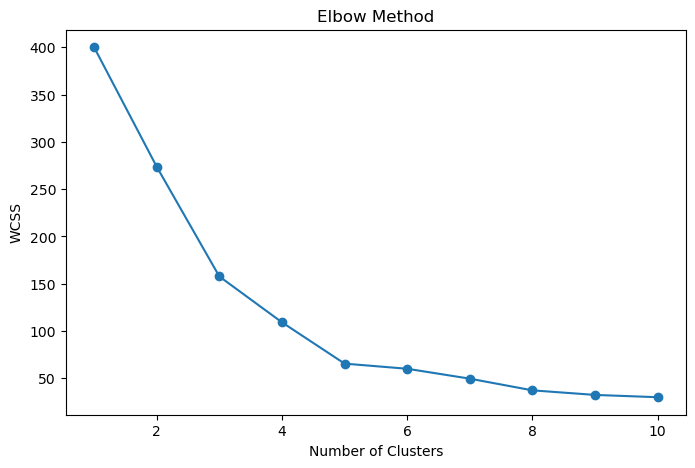

In [17]:
# ----------------------Plotting Elbow Method--------------------------------
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [30]:
# ---------------- SILHOUETTE SCORE ----------------
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(x_scaled)
    score = silhouette_score(x_scaled, labels)
    print(f"k={i} | Silhouette Score: {score}")

k=2 | Silhouette Score: 0.3973270007887498
k=3 | Silhouette Score: 0.46658474419000145
k=4 | Silhouette Score: 0.49434988482196784
k=5 | Silhouette Score: 0.5546571631111091
k=6 | Silhouette Score: 0.5138257534676561
k=7 | Silhouette Score: 0.50200146805547
k=8 | Silhouette Score: 0.4550112502601921
k=9 | Silhouette Score: 0.4566624374485964
k=10 | Silhouette Score: 0.44475993501732874


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

In [31]:
# ---------------- K-MEANS CLUSTERING ----------------
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
df["KMeans_Cluster"] = kmeans.fit_predict(x_scaled)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


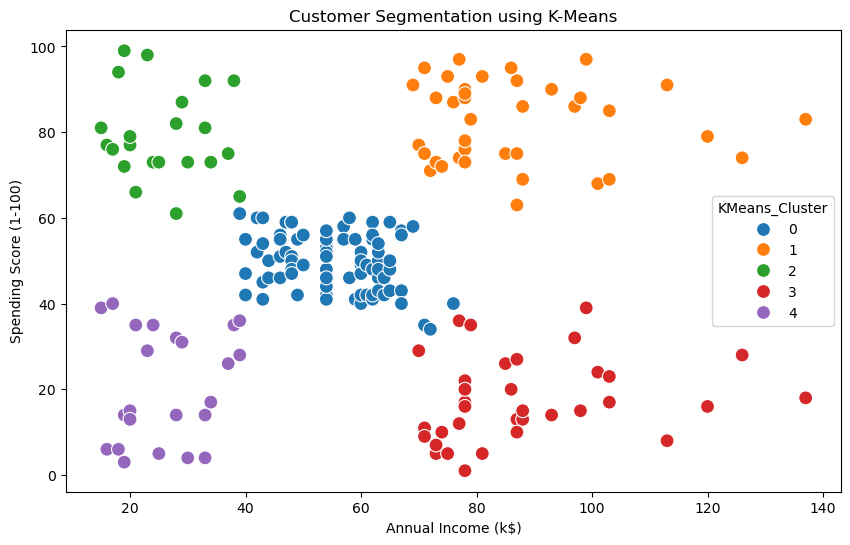

In [32]:
# -------------------Plotting K-Means------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["KMeans_Cluster"],
    palette="tab10",
    s=100
)
plt.title("Customer Segmentation using K-Means")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [27]:
cluster_summary = df.groupby("KMeans_Cluster").agg({
    "Annual Income (k$)":"mean",
    "Spending Score (1-100)":"mean"
})
print(cluster_summary)

                Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                            
0                        55.296296               49.518519
1                        86.538462               82.128205
2                        25.727273               79.363636
3                        88.200000               17.114286
4                        26.304348               20.913043


In [ ]:
def marketing_strategy(row):
    if row["Annual Income (k$)"] > 70 and row["Spending Score (1-100)"] > 70:
        return "Premium customers – VIP & loyalty programs"
    elif row["Annual Income (k$)"] > 70:
        return "Potential customers – discounts & awareness"
    elif row["Spending Score (1-100)"] > 70:
        return "Deal seekers – flash sales & coupons"
    elif row["Annual Income (k$)"] < 40 and row["Spending Score (1-100)"] < 40:
        return "Low-value customers – minimal marketing"
    else:
        return "Average customers – personalized offers"

cluster_summary["Marketing Strategy"] = cluster_summary.apply(marketing_strategy, axis=1)

st.dataframe(cluster_summary)

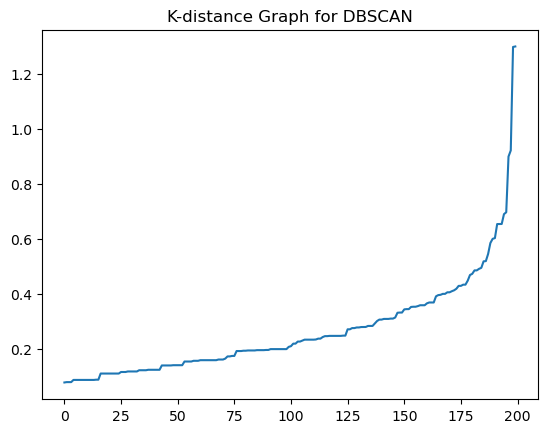

In [21]:
# ---------------- DBSCAN (EPS SELECTION) ----------------
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(x_scaled)
distances, _ = nbrs.kneighbors(x_scaled)
distances = np.sort(distances[:, 4])

plt.plot(distances)
plt.title("K-distance Graph for DBSCAN")
plt.show()

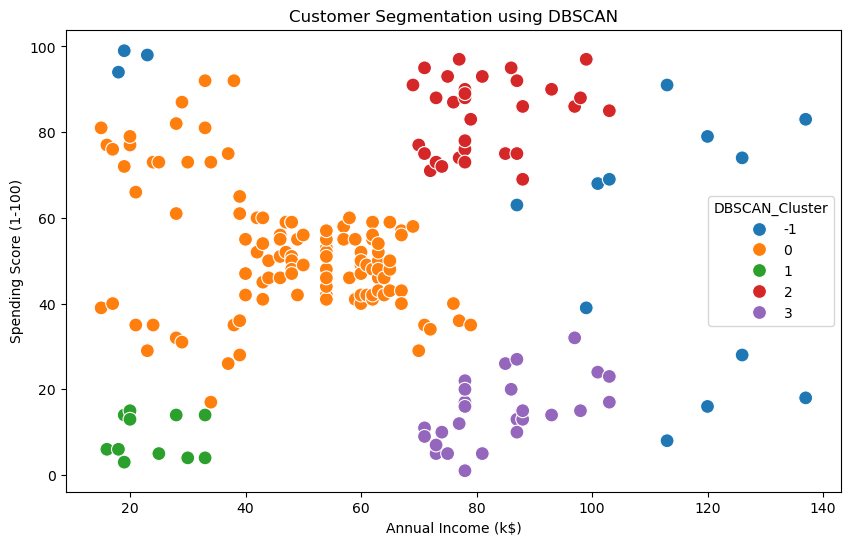

In [33]:
# ---------------- DBSCAN CLUSTERING ----------------
dbscan = DBSCAN(eps=0.4, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(x_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["DBSCAN_Cluster"],
    palette="tab10",
    s=100
)
plt.title("Customer Segmentation using DBSCAN")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()